In [150]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [102]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import shap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm

## GOLD prices prediction with Regression and Decission tree models, Feature engineering, EDA 
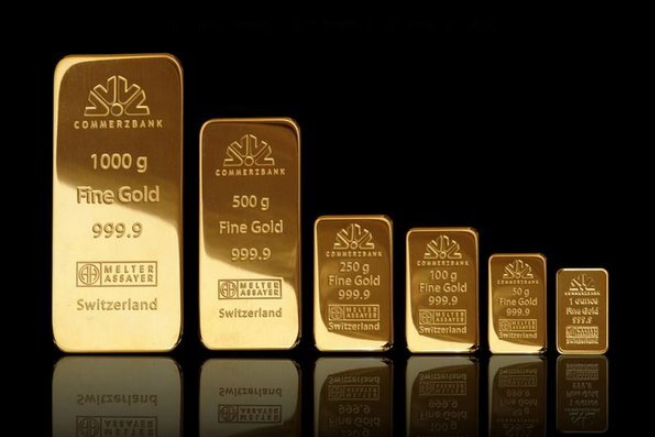

## The main goal is: 
to see how Crude oil price, interest rate (repo rate), Indian currency price in dollars, Sensex (BSE), Inflation rate and US Dollar index **will follow a relationship with the gold price** and make Gold price predictions.

**Column definitions:**
 - Date - Monthly Data from October 2000 to August 2020;
 - Gold_Price - Gold Prices for the same period;
 - Crude_Oil - Crude Oil Prices;
 - Interest_Rate - Interest rate;
 - USD_INR - Exchange rate of Dollar to Rupees;
 - Sensex - Sensex Value, indicating the relative prices of shares on the Mumbai (Bombay) Stock Exchange;
 - CPI - Consumer Price Index;
 - USD_Index - US Dollar Index.


In [146]:
gold = pd.read_csv('https://github.com/girzad/SDA_PP_R/blob/dc45b722e339e9406b7222aa406baa528b87a41f/GoldUP.csv?raw=true')
gold.Date = pd.to_datetime(gold.Date, format="%d-%m-%Y")

In [5]:
print('Shape of this DataFrame is:', gold.shape)
gold.head()

Shape of this DataFrame is: (239, 8)


Date  Gold_Price  Crude_Oil  Interest_Rate    USD_INR   Sensex    CPI  \
0 2000-10-01        4538    1455.51            8.0  46.318297  3711.02  37.23   
1 2000-11-01        4483    1512.47            8.0  46.783613  3997.99  37.31   
2 2000-12-01        4541    1178.11            8.0  46.745856  3972.12  36.98   
3 2001-01-01        4466    1208.18            8.0  46.536033  4326.72  36.90   
4 2001-02-01        4370    1267.18            7.5  46.514595  4247.04  36.73   

   USD_Index  
0     116.65  
1     115.24  
2     109.56  
3     110.52  
4     112.01

## The main ifnormation about the dataset

In [147]:
from pandas_profiling import ProfileReport
profile = ProfileReport(gold, title="Gold Dataset", html={'style': {'full_width':
                        True}}, sort=None)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
def plot_timeseries(axis, x, y, color, xlabel, ylabel):
    axis.plot(x, y, color=color)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.tick_params('y', colors=color)

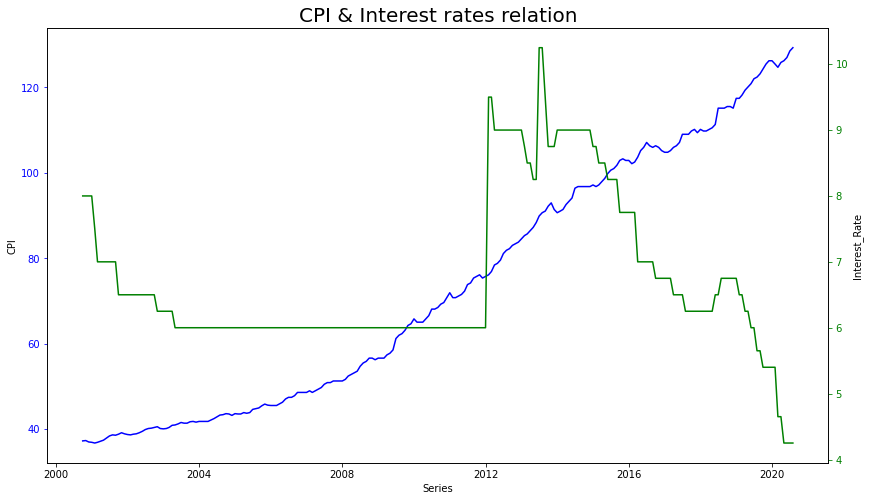

In [60]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,8)
plt.title('CPI & Interest rates relation', fontsize = 20)

plot_timeseries(ax, gold.Date, gold.CPI, 'b', 'Series', 'CPI')

ax2 = ax.twinx()
plot_timeseries(ax2, gold.Date, gold.Interest_Rate, 'g', 'Series', 'Interest_Rate')

The increase in the CPI may lower real interest rates, which can be positive for the price of gold, and may increase gold demand. 

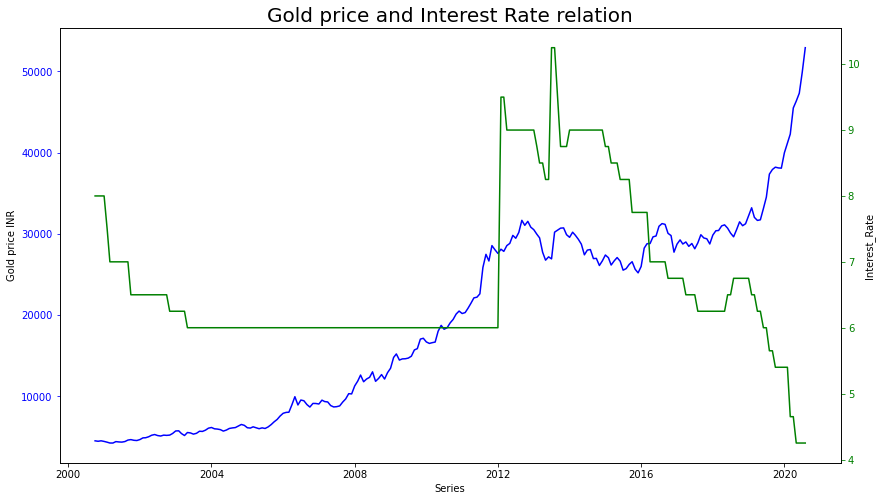

In [9]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,8)
plt.title('Gold price and Interest Rate relation', fontsize = 20)

plot_timeseries(ax, gold.Date, gold.Gold_Price, 'b', 'Series', 'Gold price INR')

ax2 = ax.twinx()
plot_timeseries(ax2, gold.Date, gold.Interest_Rate, 'g', 'Series', 'Interest_Rate')

Gold price and Interest rate traditionally have a negative correlation. This is because rising interest rates make investments more atractive for investors.

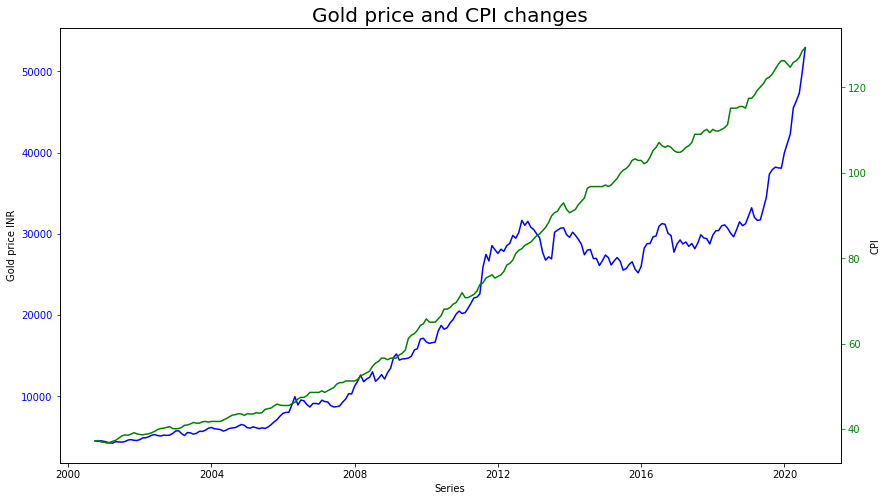

In [10]:
  
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,8)
plt.title('Gold price and CPI changes', fontsize = 20)

plot_timeseries(ax, gold.Date, gold.Gold_Price, 'b', 'Series', 'Gold price INR')

ax2 = ax.twinx()
plot_timeseries(ax2, gold.Date, gold.CPI, 'g', 'Series', 'CPI')

Gold is often seen as a hedge against a rise in the CPI. The CPI is a useful inflation indicator. The data shows that while CPI increases - Gold price increases as well. Gold price may not react to CPI's changes because of inflation.

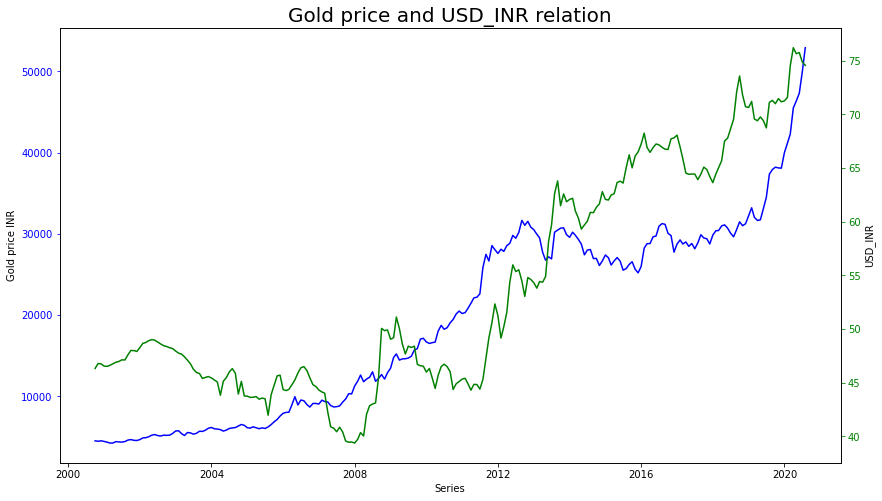

In [11]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,8)
plt.title('Gold price and USD_INR relation', fontsize = 20)

plot_timeseries(ax, gold.Date, gold.Gold_Price, 'b', 'Series', 'Gold price INR')

ax2 = ax.twinx()
plot_timeseries(ax2, gold.Date, gold.USD_INR, 'g', 'Series', 'USD_INR')

The stronger the US dollar is, the higher USD_INR rate and the higher gold price is.

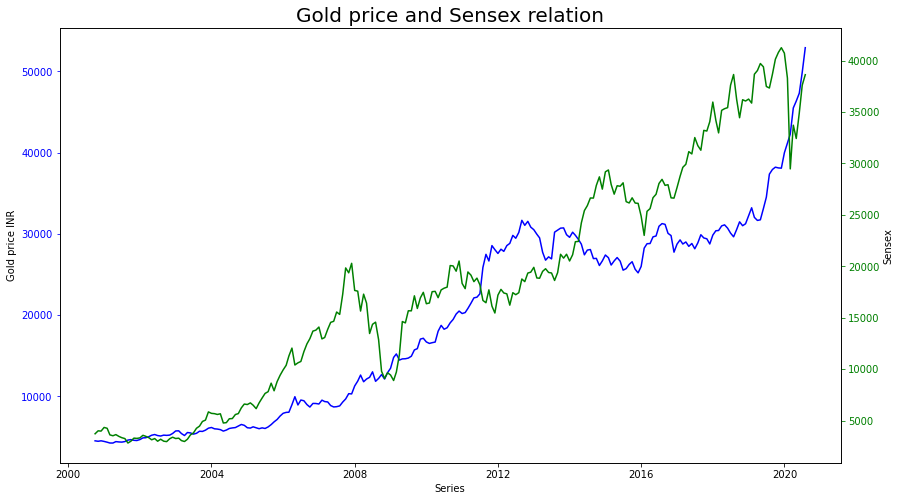

In [12]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,8)
plt.title('Gold price and Sensex relation', fontsize = 20)

plot_timeseries(ax, gold.Date, gold.Gold_Price, 'b', 'Series', 'Gold price INR')

ax2 = ax.twinx()
plot_timeseries(ax2, gold.Date, gold.Sensex, 'g', 'Series', 'Sensex')

Gold price and Sensex do not have direct impact to one another. The stock market prices are more a reflection of the 
country’s industrial growth, stability and economic performance. 

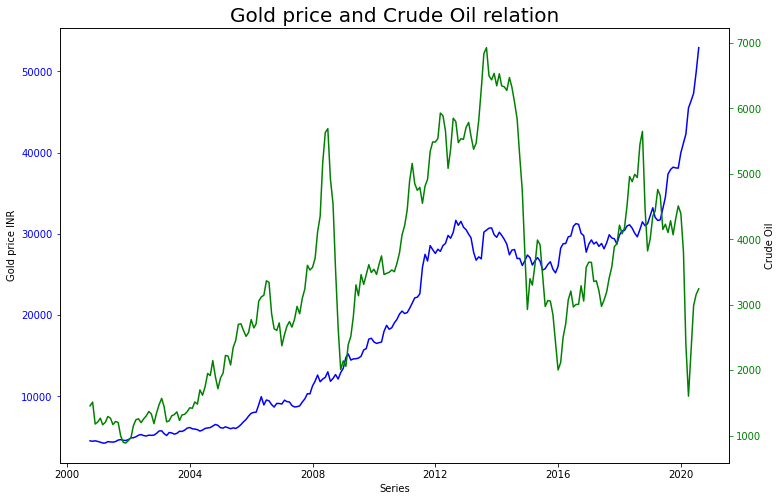

In [149]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Gold price and Crude Oil relation', fontsize = 20)

plot_timeseries(ax, gold.Date, gold.Gold_Price, 'b', 'Series', 'Gold price INR')

ax2 = ax.twinx()
plot_timeseries(ax2, gold.Date, gold.Crude_Oil, 'g', 'Series', 'Crude Oil')

When energy prices and the price of energy-related commodities go down, so do oil prices. When this happens, managers of oil companies end up selling gold that they have kept as a protection from inflation.

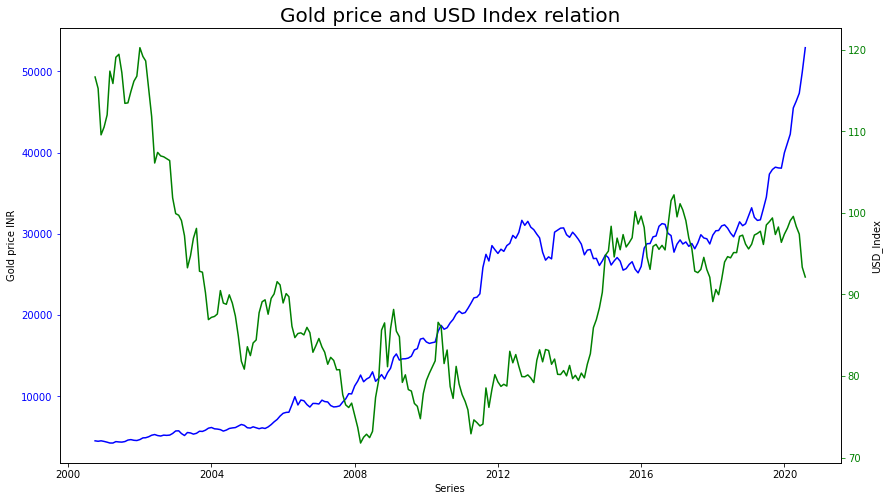

In [14]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,8)
plt.title('Gold price and USD Index relation', fontsize = 20)

plot_timeseries(ax, gold.Date, gold.Gold_Price, 'b', 'Series', 'Gold price INR')

ax2 = ax.twinx()
plot_timeseries(ax2, gold.Date, gold.USD_Index, 'g', 'Series', 'USD_Index')

Interest rates varies in nations, impacts in their economies and the price of gold there may differ as well. Gold is traded in US Dollars, its interest rates have a particular impact on the gold price. USD index changes has a profound impact on the gold price. Usualy it has a negative correlation, gold price drops while USD Index increases and vise versa.

In [15]:
# commented only for slides, in order to subplot jointplots which is inpossible in other way

# Regreesion relation with gold variable
# sns.jointplot(x = gold.CPI, y = gold.Gold_Price, color = 'blue', kind = "reg")
# sns.jointplot(x = gold.USD_INR, y = gold.Gold_Price, color = 'blue', kind = "reg")
# sns.jointplot(x = gold.Sensex, y = gold.Gold_Price, color = 'blue', kind = "reg")
# sns.jointplot(x = gold.Crude_Oil, y = gold.Gold_Price, color = 'blue', kind = "reg")
# sns.jointplot(x = gold.Interest_Rate, y = gold.Gold_Price, color = 'blue', kind = "reg")
# sns.jointplot(x = gold.USD_Index, y = gold.Gold_Price, color = 'blue', kind = "reg")

## Regression line implementation , all data features
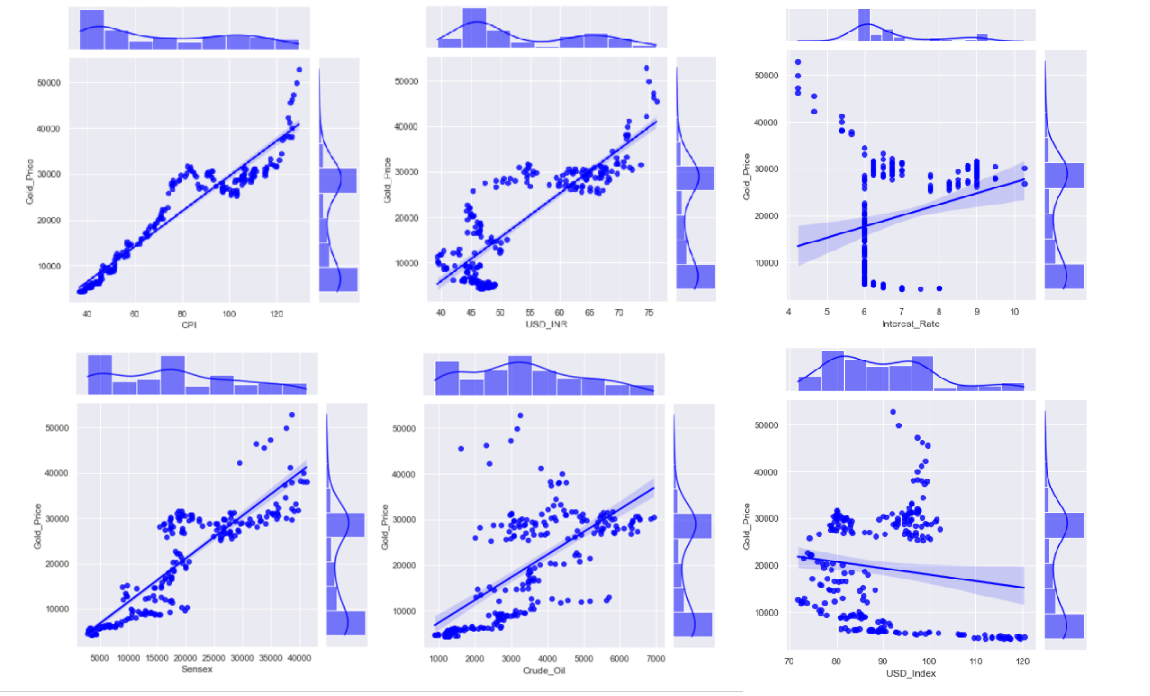

## Gold price seasonality and trend during the period

### Additive
An additive model. The components are added together:

y(t) = Level + Trend + Seasonality + Noise

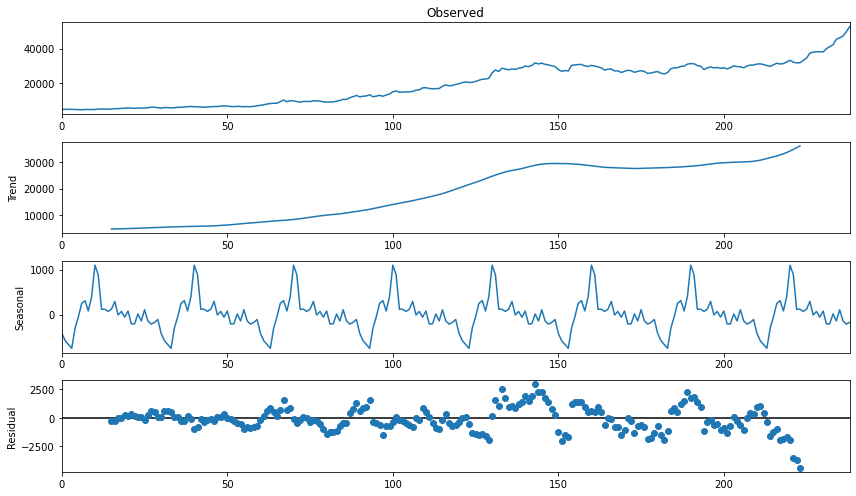

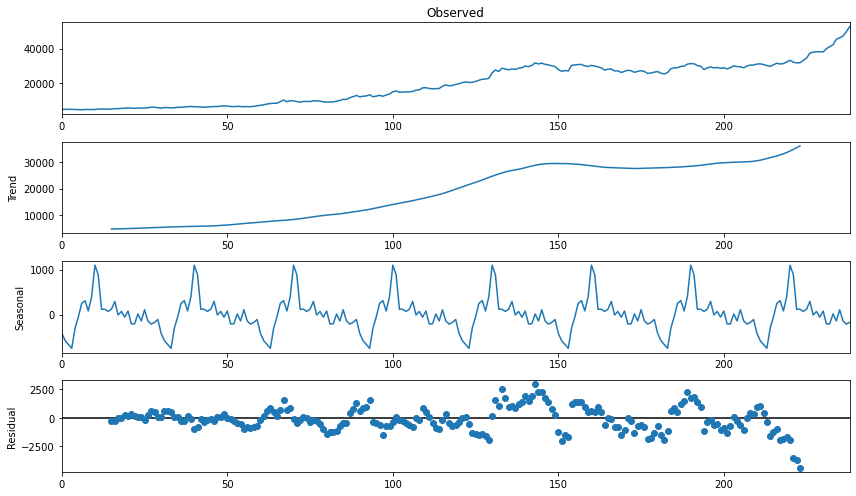

In [58]:
series = pd.DataFrame(data=gold['Gold_Price'], columns = ['Gold_Price'] ).dropna()
additive = seasonal_decompose(series.values, model = 'additive', period = 30)
plt.rcParams["figure.figsize"] = (12,7)
additive.plot()

### Multiplicative
A multiplicative model. The components are multiplied together:

y(t) = Level + Trend + Seasonality + Noise

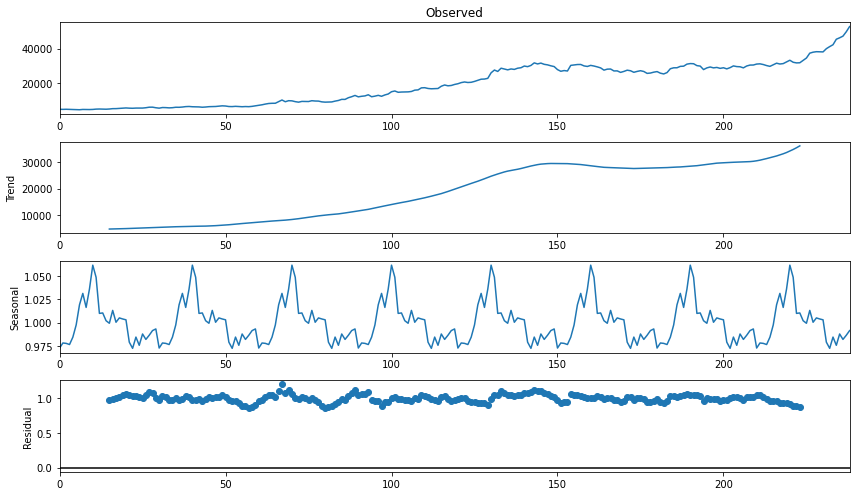

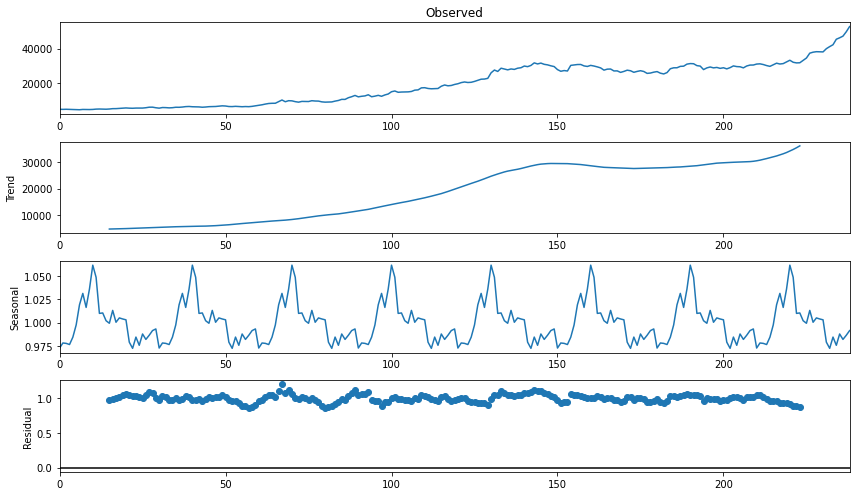

In [75]:
multiplicative = seasonal_decompose(series.values, model = 'multiplicative', period = 30)
plt.rcParams["figure.figsize"] = (12,7)
multiplicative.plot()

## Trend

In [106]:
def plot_ts(gold, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = gold.rolling(window=window).mean()    
   rolling_std = gold.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title('Gold')    
   plt.plot(gold[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="r")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=gold.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

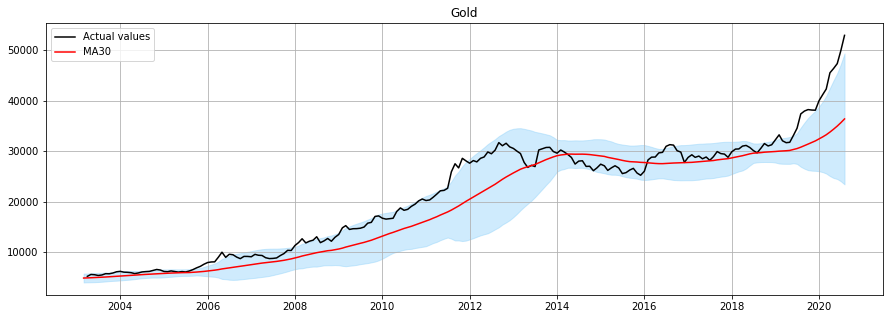

In [142]:
plot_ts(gold['Gold_Price'], window=30)

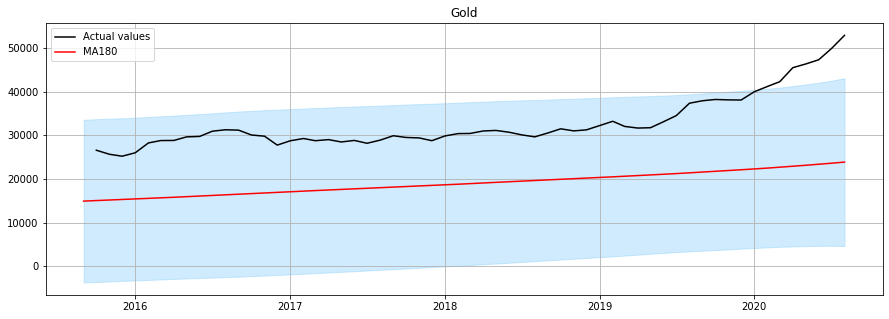

In [141]:
plot_ts(gold['Gold_Price'], window=180)

Trend analysys let's us know that it is a linear uptrend

## Outliers Detection
in a time series using a clustering algorithm

<AxesSubplot:>

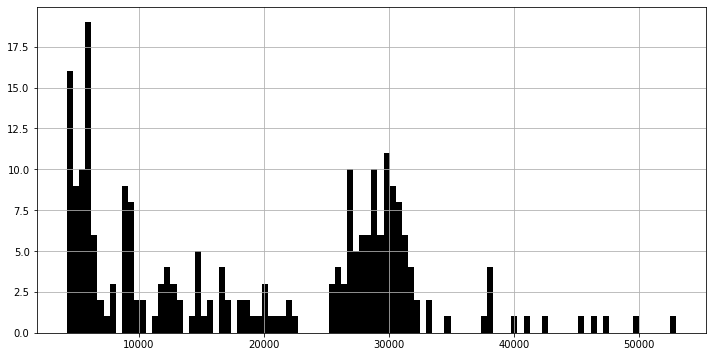

In [152]:
gold['Gold_Price'].hist(color="black", bins=100, figsize=(12,6))

<AxesSubplot:>

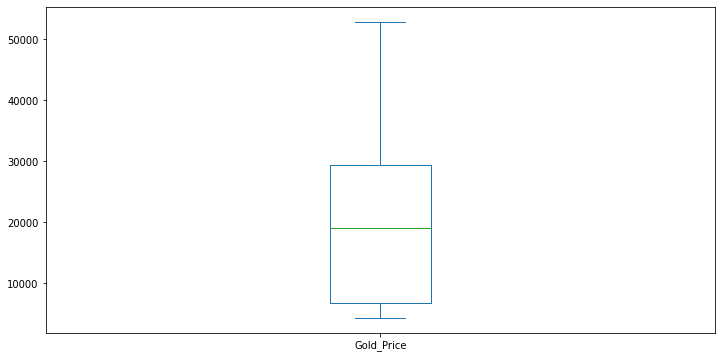

In [151]:
gold['Gold_Price'].plot.box(figsize=(12,6))

In [115]:
'''Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param gold: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw gold, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(gold, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(gold.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
    ## dtf output
    dtf_outliers = gold.to_frame(name="ts")
    dtf_outliers["index"] = range(len(gold))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

In [114]:
'''
Interpolate outliers in a gold.
'''
def remove_outliers(gold, outliers_idx, figsize=(15,5)):
    ts_clean = gold.copy()
    ts_clean.loc[outliers_idx] = np.nan
    ts_clean = ts_clean.interpolate(method="linear")
    ax = gold.plot(figsize=figsize, color="red", alpha=0.5,
         title="Remove outliers", label="original", legend=True)
    ts_clean.plot(ax=ax, grid=True, color="black",
                  label="interpolated", legend=True)
    plt.show()
    return ts_clean

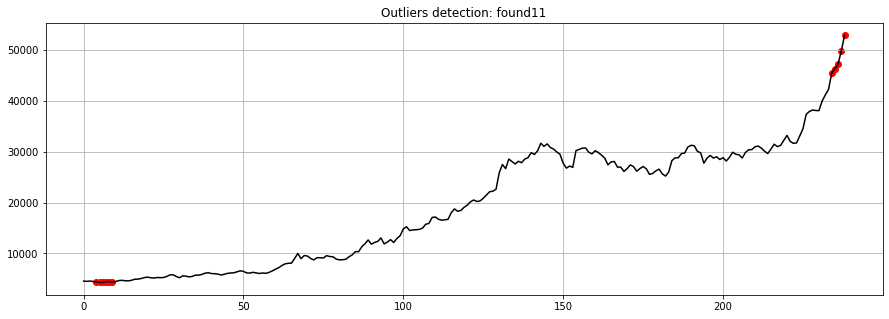

In [116]:
dtf_outliers = find_outliers(gold['Gold_Price'], perc=0.05)

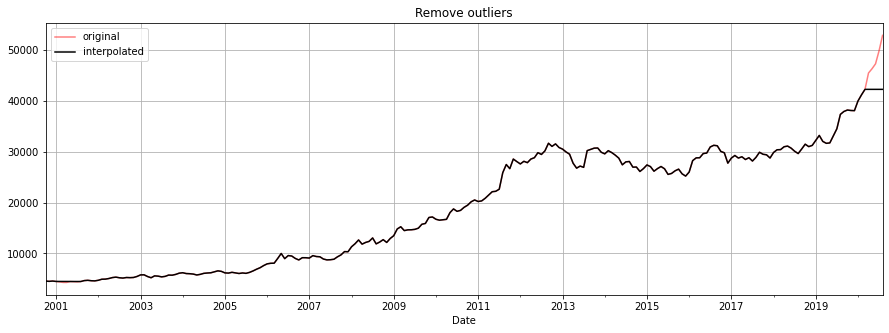

In [117]:
## outliers index position
outliers_index_pos = dtf_outliers[dtf_outliers["outlier"]==1].index
## exclude outliers
ts_clean = remove_outliers(gold['Gold_Price'], outliers_idx=outliers_index_pos)

It may be not a good idea to remove outliers in this case, the amount of data we have is very small and we don't know which factors affected such a rapid gold price rise at the end of 2020, so our choice is to build all the models using raw dataset.

## Testing statsmodels.api
R-squared is equal to 92 % which means that model can excplain 92 % o data.

In [19]:
# Splitting data
idx = gold.Date < '2018-01-01'
X_tr = gold[idx].drop(columns=['Gold_Price', 'Date'])
X_te = gold[~idx].drop(columns=['Gold_Price', 'Date'])
y_train = gold[idx].Gold_Price
y_test = gold[~idx].Gold_Price
date_train = gold[idx].Date
date_test = gold[~idx].Date

In [20]:
features = ['Crude_Oil', 'USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]

X_train.shape, X_test.shape

((207, 4), (32, 4))

In [21]:
X_tr.shape, X_te.shape

((207, 6), (32, 6))

In [140]:
import statsmodels.api as sm 
y = gold.Gold_Price
X = gold.CPI
x_train = sm.add_constant(X)

In [23]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2717.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          7.83e-132
Time:                        07:01:19   Log-Likelihood:                -2275.3
No. Observations:                 239   AIC:                             4555.
Df Residuals:                     237   BIC:                             4562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8911.8340    582.067    -15.311      0.000   -1.01e+04   -7765.148
CPI          384.4911      7.376     52.126      0.000     369.960     399.022
==============================================================================
Omnibus:                       43.859   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.817
Skew:                           1.130   Prob(JB):                     2.29e-14
Kurtosis:                       4.096   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Functions to validate our models

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

def mae(y_test, y_pred):
    return round(mean_absolute_error(y_test, y_pred), 4)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 4)

def wmape(y_test, y_pred):
    wmape = sum(np.abs(y_test-y_pred)) / sum(np.abs(y_test))
    return round(wmape, 4)

## Splitting sample to test and train

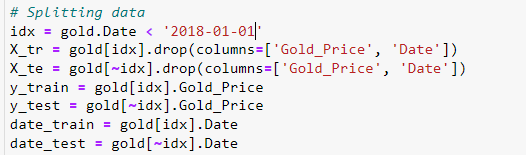

### Single variable Linear regression
`CPI`

CPI has the highest correlation rates.

In [25]:
features = ['CPI']
X_train = X_tr[features]
X_test = X_te[features]

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.1222
WMAPE: 0.1204
MAE: 4329.6631
RMSE: 4884.5985


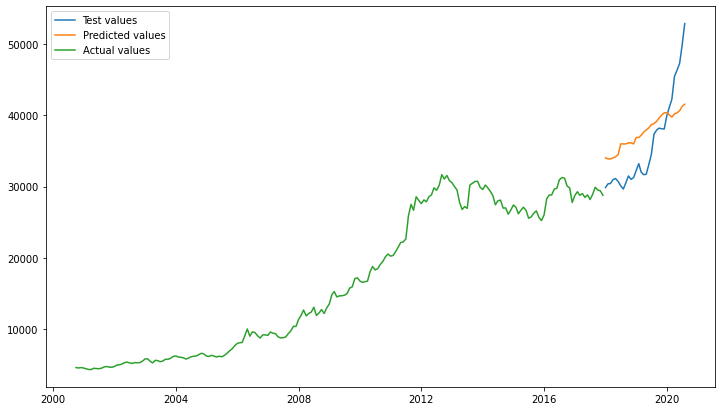

In [26]:
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.rcParams["figure.figsize"] = (14,5)
plt.legend()

## Polynomial regression
Single variable: `CPI`

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)

LinearRegression()

In [28]:
X_poly.shape

(207, 5)

In [31]:
print(f'Validation MAPE: {mape(y_test, y_pred_pol)}')
print(f'Validation WMAPE: {wmape(y_test, y_pred_pol)}')
print(f'Validation MAE: {mae(y_test, y_pred_pol)}')
print(f'Validation RMSE: {rmse(y_test, y_pred_pol)}')

Validation MAPE: 0.0931
Validation WMAPE: 0.1043
Validation MAE: 3750.9173
Validation RMSE: 5099.7338


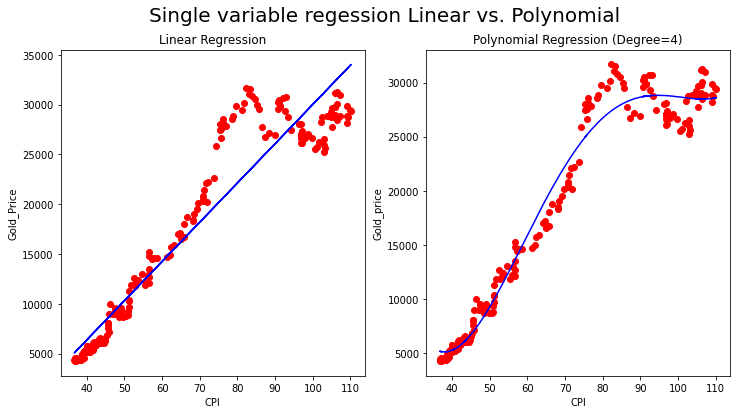

In [67]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Single variable regession Linear vs. Polynomial', fontsize=20)

ax[0].scatter(X_train,y_train,color='red')
ax[0].plot(X_train,lr.predict(X_train),color='blue')
ax[0].set_title('Linear Regression')
ax[0].set_xlabel('CPI')
ax[0].set_ylabel('Gold_Price')

X_grid=np.arange(36.73, 110.17,0.1)
X_grid=X_grid.reshape((len(X_grid),1))
ax[1].scatter(X_train,y_train,color='red')
ax[1].plot(X_train,lin_reg2.predict(poly_reg.fit_transform(X_train)),color='blue')
ax[1].set_title('Polynomial Regression (Degree=4)')
ax[1].set_xlabel('CPI')
ax[1].set_ylabel('Gold_price')
plt.show()

In [30]:
y_pred_pol = lin_reg2.predict( poly_reg.fit_transform(X_test))
y_pred_pol

array([28593.17306476, 28566.29459447, 28566.29459447, 28593.17306476,
       28624.0451977 , 28699.65260871, 29387.23705453, 29387.23705453,
       29387.23705453, 29489.20767044, 29489.20767044, 29387.23705453,
       30115.69184664, 30115.69184664, 30419.43852687, 30945.36176978,
       31339.67760071, 31779.56161826, 32516.89185528, 32782.76911243,
       33357.06089368, 34298.8784953 , 35366.58761979, 36151.47117644,
       36151.47117644, 35366.58761979, 34647.33959101, 35746.71666623,
       36151.47117644, 36983.9813878 , 38843.94831113, 39878.05177548])

## Multiple variable Linear regression

Most correlated variables chosen: `Crude_Oil`, `USD_INR`, `Sensex`,`CPI`

In [34]:
features = ['Crude_Oil', 'USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]

lr_mult = LinearRegression()
reg = lr_mult.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.0841
WMAPE: 0.1002
MAE: 3605.2353
RMSE: 5878.8707


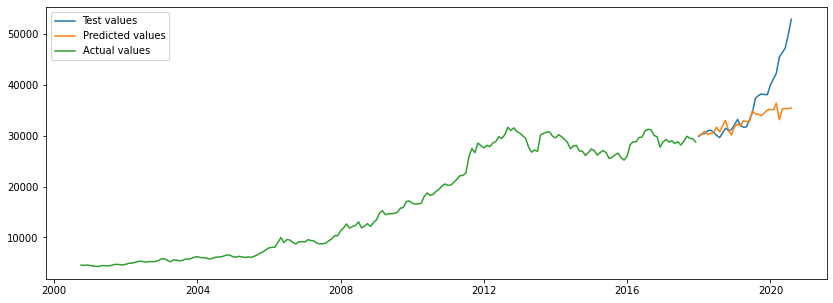

In [35]:
# plot lines
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.rcParams["figure.figsize"] = (14,5)
plt.legend()

# Multiple variables Linear regression - best prediction

Variables: `USD_INR`, `Sensex`,`CPI`

MAPE = `8.02%`, it implies that the model is 91.98% accurate.

In [153]:
features = ['USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]

lr_mult2 = LinearRegression()
reg = lr_mult2.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.0802
WMAPE: 0.0919
MAE: 3304.8368
RMSE: 4964.9487


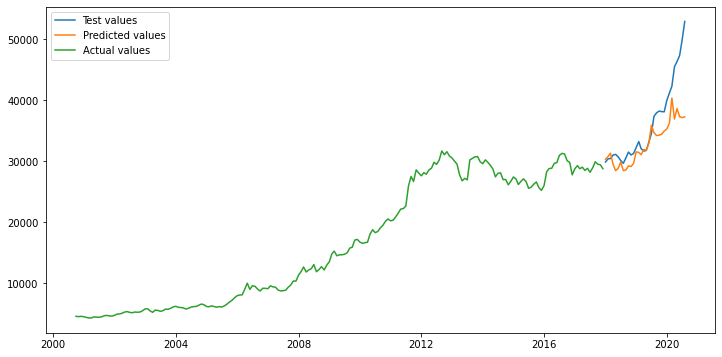

In [154]:
# plot lines
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.rcParams["figure.figsize"] = (14,5)
plt.legend()

## SHAP to 1 line of data

In [155]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show] 
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_y_pred = lr_mult2.predict(data_for_prediction_array)[0]
print()
print('Linear Model')
print()
print(f'Actual price: ${y.iloc[row_to_show]:,.0f}')
print(f'Predicted price: ${my_y_pred:,.0f}')


Linear Model

Actual price: $4,269
Predicted price: $28,835


In [156]:
shap.initjs()

# Create object that can calculate shap values
explainer = shap.Explainer(lr_mult2, X_train, feature_names=features)

shap_values = explainer.shap_values(data_for_prediction)

shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

CPI makes the greatest impact to a predicted price. It is clear that only 3 features is not enough to predict gold price.

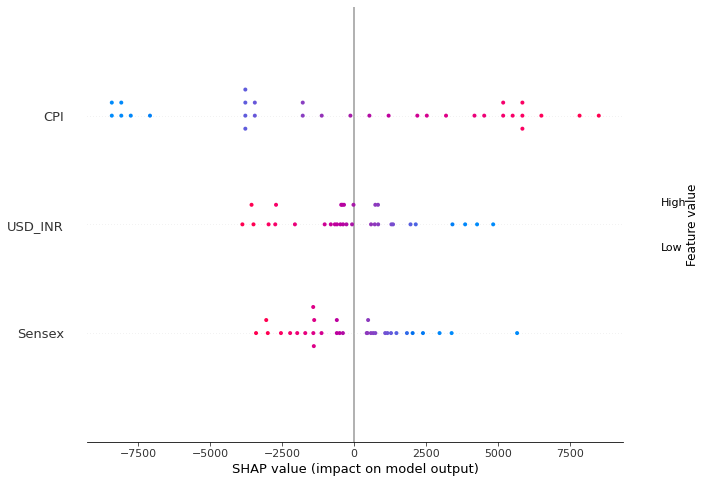

In [40]:
# Create object that can calculate shap values
explainer = shap.LinearExplainer(lr_mult2, X_test)

# Calculate shap_values for all data points.
shap_values = explainer.shap_values(X_test)

# Make plot
shap.summary_plot(shap_values, X_test, plot_size=[12,8])

Shap explainer, implemented on our best model with 3 features selected.

## Logaritmic price
Variables: `USD_INR`, `Sensex`,`CPI`

Model does not perform better with logaritmic price

In [128]:
features = ['USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]
y_train_log = np.log(gold[idx].Gold_Price)
y_test_log = np.log(gold[~idx].Gold_Price)

lr_log = LinearRegression()
reg = lr_log.fit(X_train, y_train_log)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(np.exp(y_test_log), y_pred)}')
print(f'WMAPE: {wmape(np.exp(y_test_log), y_pred)}')

print(f'MAE: {mae(np.exp(y_test_log), y_pred)}')
print(f'RMSE: {rmse(np.exp(y_test_log), y_pred)}')

MAPE: 0.9997
WMAPE: 0.9997
MAE: 35963.0663
RMSE: 36541.1099


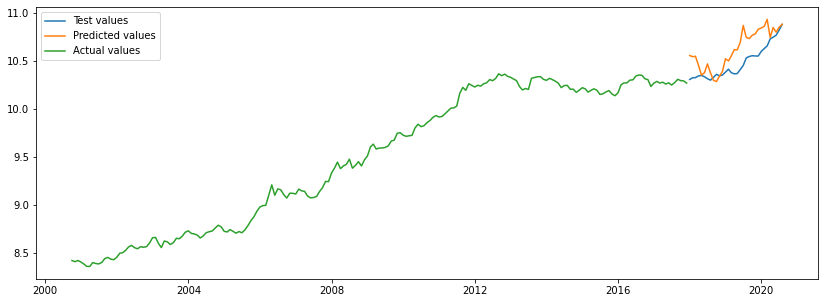

In [131]:
# plot lines
plt.plot(date_test, y_test_log, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train_log, label = "Actual values")
plt.rcParams["figure.figsize"] = (14,5)
plt.legend()

## Decission tree
ALL the features of our dataset were used in this moel. It is seen that decission tree model does not fit our dataset and should not be interpreted.

In [41]:
features = ['Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI', 'USD_Index']

X_train = X_tr[features]
X_test = X_te[features]

dtr = DecisionTreeRegressor(random_state=42, max_depth=12, min_samples_split=5)
tree_model = dtr.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)


print('******* Decision Tree, max_depth=10 *******')
print()
print(f'Validation MAPE: {mape(y_test, y_pred)}')
print(f'Validation WMAPE: {wmape(y_test, y_pred)}')
print(f'Validation MAE: {mae(y_test, y_pred)}')
print(f'Validation RMSE: {rmse(y_test, y_pred)}')

******* Decision Tree, max_depth=10 *******

Validation MAPE: 0.1564
Validation WMAPE: 0.18
Validation MAE: 6476.4115
Validation RMSE: 9249.9847


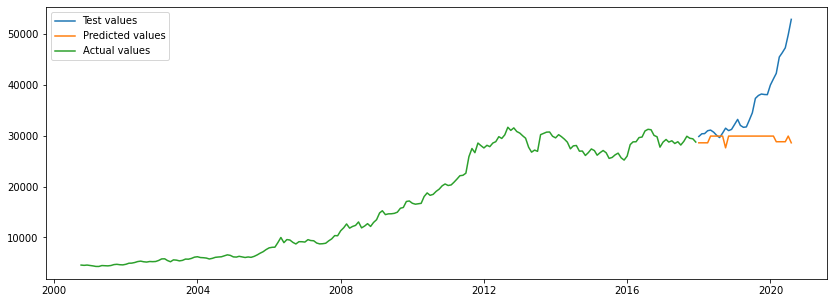

In [42]:
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.rcParams["figure.figsize"] = (14,5)
plt.legend()

In [43]:
import eli5
from eli5.sklearn import PermutationImportance

## Permutation importance
This table gives us the weight associated to each feature. The value tells us how much of an impact a feature has on the predictions on average, the sign tells us in which direction. 
Here we can see that `USD_IND`, `USD_Index` and `Crude_Oil` have the biggest impact on our predictions in three model.

In [44]:
perm = PermutationImportance(dtr, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

## Building a model with ARIMA

In [132]:
# ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
arima = pd.read_csv('https://github.com/girzad/SDA_PP_R/blob/dc45b722e339e9406b7222aa406baa528b87a41f/GoldUP.csv?raw=true')

In [78]:
test = arima['Gold_Price'][200:]
train = arima['Gold_Price'][:200]

Text(0, 0.5, 'LOG price')

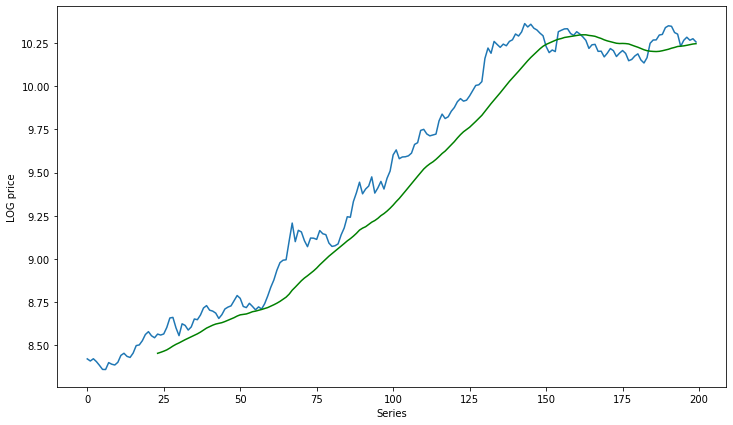

In [79]:
train_log = np.log(train)
test_log = np.log(test)
moving_avg = train_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(moving_avg, color='green')
plt.xlabel('Series')
plt.ylabel("LOG price")

In [136]:
import warnings

warnings.filterwarnings("ignore")

In [138]:
model1 = ARIMA(arima['Gold_Price'], order=(1,2,2))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Gold_Price   No. Observations:                  237
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1896.686
Method:                       css-mle   S.D. of innovations            721.000
Date:                Sat, 19 Feb 2022   AIC                           3803.371
Time:                        07:09:34   BIC                           3820.712
Sample:                             2   HQIC                          3810.361
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.0136      5.430      1.107      0.268      -4.630      16.657
ar.L1.D2.Gold_Price    -0.7082      0.162     -4.366      0.000      -1.026      -0.390
ma.L1.D2.Gold_Pr

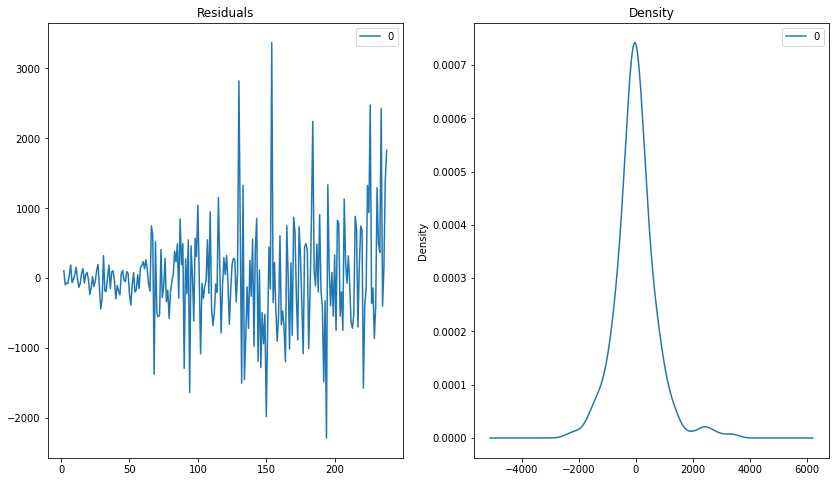

In [91]:
residuals = pd.DataFrame(model1_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(14, 8))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [139]:
model2 = ARIMA(train, order=(1,2,2))
fitted = model2.fit(disp=-1)
fc, se, conf = fitted.forecast(39, alpha=0.05) 

In [93]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index=test.index)
upper_series = pd.Series(conf[:,1], index=test.index)

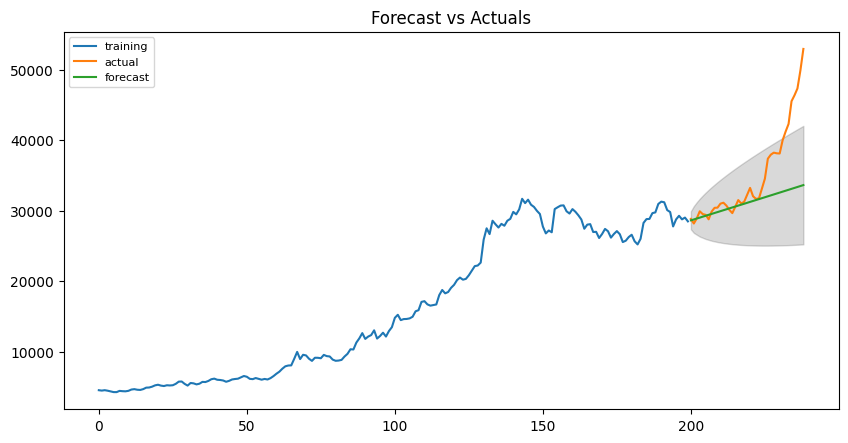

In [96]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [95]:
print(f'Validation MAPE: {mape(test, fc)}')
print(f'Validation WMAPE: {wmape(test, fc)}')
print(f'Validation MAE: {mae(test, fc)}')
print(f'Validation RMSE: {rmse(test, fc)}')

Validation MAPE: 0.0885
Validation WMAPE: 0.1078
Validation MAE: 3742.8429
Validation RMSE: 6314.1799


## Future forecast (10 periods)

In [97]:
model = pm.auto_arima(arima.Gold_Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3805.279, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3915.780, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3871.797, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3805.572, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3913.835, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3806.561, Time=0.30 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3804.850, Time=0.42 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3804.983, Time=0.27 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3806.769, Time=0.48 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3806.774, Time=0.54 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3806.301, Time=0.46 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3803.797, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3803.940, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : 

In [99]:
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(arima.Gold_Price), len(arima.Gold_Price)+n_periods)

In [100]:
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

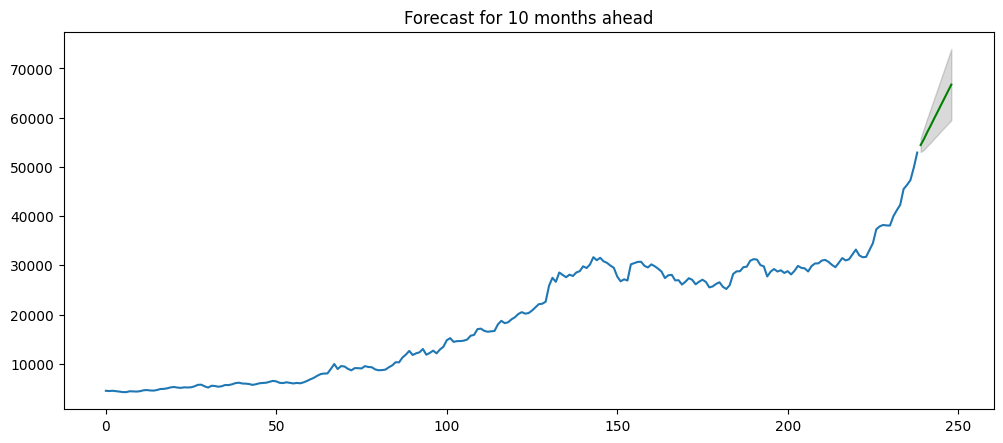

In [101]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(arima.Gold_Price)
plt.plot(fc_series, color='Green')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast for 10 months ahead")
plt.show()

## Conclusions
The model with variables used: `Sensex`, `USD-INR`, `CPI`, best described the regression model to predict the Forecast. Decission tree does not fit for this dataset. Single variable Polynomial model showed better results than Linear model.